# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import joblib

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv("../ex02/data/dayofweek.csv")
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
y = df['dayofweek']
X = df.drop(columns=['dayofweek'])

In [4]:
# Ma'lumotlarni o'qitish va test to'plamlariga ajratish
X_train_non_stratified, X_test_non_stratified, y_train_non_stratified, y_test_non_stratified = train_test_split(
    X, y, test_size=0.2, random_state=21
)

print(f"\nMa'lumotlar {X.shape[0]} ta qatordan iborat.")
print(f"O'qitish to'plami hajmi: {X_train_non_stratified.shape[0]} ta qator.")
print(f"Test to'plami hajmi: {X_test_non_stratified.shape[0]} ta qator.")


Ma'lumotlar 1686 ta qatordan iborat.
O'qitish to'plami hajmi: 1348 ta qator.
Test to'plami hajmi: 338 ta qator.


In [5]:
# Ma'lumotlarni `stratify=y` parametri bilan ajratamiz
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

# Taqsimotni tekshirish uchun y_train_non_stratified va y_test_non_stratified.value_counts() dan foydalaniladi
y_train_non_stratified_counts = y_train_non_stratified.value_counts().sort_index()
print("O'qitish to'plamidagi 'dayofweek' taqsimoti (mutlaq son):")
y_train_non_stratified_counts

O'qitish to'plamidagi 'dayofweek' taqsimoti (mutlaq son):


dayofweek
0    105
1    222
2    125
3    313
4     80
5    216
6    287
Name: count, dtype: int64

In [6]:
y_train_non_stratified_percentages = y_train_non_stratified.value_counts(normalize=True).sort_index()
print("\nO'qitish to'plamidagi 'dayofweek' taqsimoti (foizda):")
y_train_non_stratified_percentages


O'qitish to'plamidagi 'dayofweek' taqsimoti (foizda):


dayofweek
0    0.077893
1    0.164688
2    0.092730
3    0.232196
4    0.059347
5    0.160237
6    0.212908
Name: proportion, dtype: float64

In [7]:
y_test_non_stratified_counts = y_test_non_stratified.value_counts().sort_index()
print("\nTest to'plamidagi 'dayofweek' taqsimoti (mutlaq son):")
y_test_non_stratified_counts


Test to'plamidagi 'dayofweek' taqsimoti (mutlaq son):


dayofweek
0    31
1    52
2    24
3    83
4    24
5    55
6    69
Name: count, dtype: int64

In [8]:
y_test_non_stratified_percentages = y_test_non_stratified.value_counts(normalize=True).sort_index()
print("\nTest to'plamidagi 'dayofweek' taqsimoti (foizda):")
y_test_non_stratified_percentages


Test to'plamidagi 'dayofweek' taqsimoti (foizda):


dayofweek
0    0.091716
1    0.153846
2    0.071006
3    0.245562
4    0.071006
5    0.162722
6    0.204142
Name: proportion, dtype: float64

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [10]:
logreg_model = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear', multi_class='ovr')
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistik Regressiya (test to'plamida) aniqligi: {accuracy_logreg}")

Logistik Regressiya (test to'plamida) aniqligi: 0.6153846153846154


### b. SVM

In [11]:
svc_base_estimator = SVC(kernel='linear', probability=True, random_state=21)
svc_model = OneVsRestClassifier(svc_base_estimator)
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC (linear kernel, test to'plamida) aniqligi: {accuracy_svc}")

SVC (linear kernel, test to'plamida) aniqligi: 0.6183431952662722


### c. Decision tree

In [12]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=21)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree (max_depth=4, test to'plamida) aniqligi: {accuracy_dt}")

Decision Tree (max_depth=4, test to'plamida) aniqligi: 0.5295857988165681


### d. Random forest

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForestClassifier (baseline, test to'plamida) aniqligi: {accuracy_rf}")

RandomForestClassifier (baseline, test to'plamida) aniqligi: 0.9289940828402367


Answer the question is `random forest`

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [14]:
# StratifiedKFold — bu scikit-learndagi kross-valitatsiya texnikasi bo‘lib, 
# u ma’lumot to‘plamini K bo‘lakka ajratadi, har bir bo‘lakda sinflar nisbati (distribution) saqlanadi.
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

In [15]:
logreg_model_cv = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')

cv_scores_logreg = cross_val_score(logreg_model_cv, X_train, y_train, cv=cv_strategy, scoring='accuracy')

mean_accuracy_logreg = np.mean(cv_scores_logreg)
std_dev_logreg = np.std(cv_scores_logreg)

print("Logistik Regressiya kross-validatsiya aniqliklari (har bir fold uchun):")
print(cv_scores_logreg)
print(f"Logistik Regressiya o'rtacha aniqligi: {mean_accuracy_logreg}")
print(f"Logistik Regressiya aniqligining standart og'ishi: {std_dev_logreg}")

Logistik Regressiya kross-validatsiya aniqliklari (har bir fold uchun):
[0.62222222 0.59259259 0.58518519 0.60740741 0.59259259 0.58518519
 0.6        0.55555556 0.6641791  0.58955224]
Logistik Regressiya o'rtacha aniqligi: 0.5994472084024323
Logistik Regressiya aniqligining standart og'ishi: 0.02701436601509257


### b. SVM

In [16]:
svc_base_estimator_cv = SVC(kernel='linear', probability=True, random_state=21)
svc_model_cv = OneVsRestClassifier(svc_base_estimator_cv)

cv_scores_svc = cross_val_score(svc_model_cv, X_train, y_train, cv=cv_strategy, scoring='accuracy')

mean_accuracy_svc = np.mean(cv_scores_svc)
std_dev_svc = np.std(cv_scores_svc)

print("SVC kross-validatsiya aniqliklari (har bir fold uchun):")
print(cv_scores_svc)
print(f"SVC o'rtacha aniqligi: {mean_accuracy_svc}")
print(f"SVC aniqligining standart og'ishi: {std_dev_svc}")

SVC kross-validatsiya aniqliklari (har bir fold uchun):
[0.61481481 0.53333333 0.58518519 0.60740741 0.53333333 0.61481481
 0.54074074 0.53333333 0.55223881 0.58208955]
SVC o'rtacha aniqligi: 0.5697291321171918
SVC aniqligining standart og'ishi: 0.033161665232855464


### c. Decision tree

In [17]:
dt_model_cv = DecisionTreeClassifier(max_depth=4, random_state=21)

cv_scores_dt = cross_val_score(dt_model_cv, X_train, y_train, cv=cv_strategy, scoring='accuracy')

mean_accuracy_dt = np.mean(cv_scores_dt)
std_dev_dt = np.std(cv_scores_dt)

print("Decision Tree kross-validatsiya aniqliklari (har bir fold uchun):")
print(cv_scores_dt)
print(f"Decision Tree o'rtacha aniqligi: {mean_accuracy_dt}")
print(f"Decision Tree aniqligining standart og'ishi: {std_dev_dt}")

Decision Tree kross-validatsiya aniqliklari (har bir fold uchun):
[0.57037037 0.51851852 0.5037037  0.55555556 0.48888889 0.4962963
 0.46666667 0.47407407 0.53731343 0.46268657]
Decision Tree o'rtacha aniqligi: 0.5074074074074074
Decision Tree aniqligining standart og'ishi: 0.03542793866550036


### d. Random forest

In [18]:
rf_model_cv = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)

cv_scores_rf = cross_val_score(rf_model_cv, X_train, y_train, cv=cv_strategy, scoring='accuracy')

mean_accuracy_rf = np.mean(cv_scores_rf)
std_dev_rf = np.std(cv_scores_rf)

print("Random Forest kross-validatsiya aniqliklari (har bir fold uchun):")
print(cv_scores_rf)
print(f"Random Forest o'rtacha aniqligi: {mean_accuracy_rf}")
print(f"Random Forest aniqligining standart og'ishi: {std_dev_rf}")

Random Forest kross-validatsiya aniqliklari (har bir fold uchun):
[0.9037037  0.88148148 0.95555556 0.95555556 0.92592593 0.92592593
 0.94074074 0.88148148 0.94029851 0.88059701]
Random Forest o'rtacha aniqligi: 0.919126589275843
Random Forest aniqligining standart og'ishi: 0.028668318001122805


#### Answer the question is `c`

## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [19]:
n_splits = 10
cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=21)

# Optimal parametrlarni topish uchun sinab ko'rish diapazonlari
max_depths = [10, 15, 20, 25, 30, None] # Chuqurlik
n_estimators_list = [50, 100, 150, 200, 250] # Daraxtlar soni

best_rf_accuracy_cv = 0
best_rf_params = {}

for depth in max_depths:
    for n_est in n_estimators_list:
        rf_model = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=21, n_jobs=-1) # n_jobs=-1 parallel ishlash uchun
        cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
        mean_acc = np.mean(cv_scores)

        print(f"  n_estimators: {n_est}, max_depth: {depth}, O'rtacha CV aniqligi: {mean_acc}")

        if mean_acc > best_rf_accuracy_cv:
            best_rf_accuracy_cv = mean_acc
            best_rf_params = {'n_estimators': n_est, 'max_depth': depth}

print(f"\nEng yaxshi RandomForest parametrlari (CV bo'yicha): {best_rf_params}")
print(f"Eng yaxshi o'rtacha CV aniqligi: {best_rf_accuracy_cv}")

# Optimal parametrlar bilan yakuniy modelni o'qitamiz (butun o'qitish to'plamida)
final_rf_model = RandomForestClassifier(n_estimators=best_rf_params['n_estimators'],
                                        max_depth=best_rf_params['max_depth'],
                                        random_state=21,
                                        n_jobs=-1)
final_rf_model.fit(X_train, y_train)


  n_estimators: 50, max_depth: 10, O'rtacha CV aniqligi: 0.7967440574903261
  n_estimators: 100, max_depth: 10, O'rtacha CV aniqligi: 0.8071310116086237
  n_estimators: 150, max_depth: 10, O'rtacha CV aniqligi: 0.8041569928137091
  n_estimators: 200, max_depth: 10, O'rtacha CV aniqligi: 0.8123051409618574
  n_estimators: 250, max_depth: 10, O'rtacha CV aniqligi: 0.8086069651741294
  n_estimators: 50, max_depth: 15, O'rtacha CV aniqligi: 0.8887341072415701
  n_estimators: 100, max_depth: 15, O'rtacha CV aniqligi: 0.8961359867330015
  n_estimators: 150, max_depth: 15, O'rtacha CV aniqligi: 0.891680486456606
  n_estimators: 200, max_depth: 15, O'rtacha CV aniqligi: 0.8939137645107795
  n_estimators: 250, max_depth: 15, O'rtacha CV aniqligi: 0.8954007739082366
  n_estimators: 50, max_depth: 20, O'rtacha CV aniqligi: 0.913200663349917
  n_estimators: 100, max_depth: 20, O'rtacha CV aniqligi: 0.9154228855721392
  n_estimators: 150, max_depth: 20, O'rtacha CV aniqligi: 0.9124709784411277
  n_

RandomForestClassifier(max_depth=30, n_estimators=200, n_jobs=-1,
                       random_state=21)

In [20]:
y_pred_final_rf = final_rf_model.predict(X_test)
accuracy_final_rf_test = accuracy_score(y_test, y_pred_final_rf)
print(f"Yakuniy RandomForest modelining test to'plamidagi aniqligi: {accuracy_final_rf_test}")

Yakuniy RandomForest modelining test to'plamidagi aniqligi: 0.9378698224852071


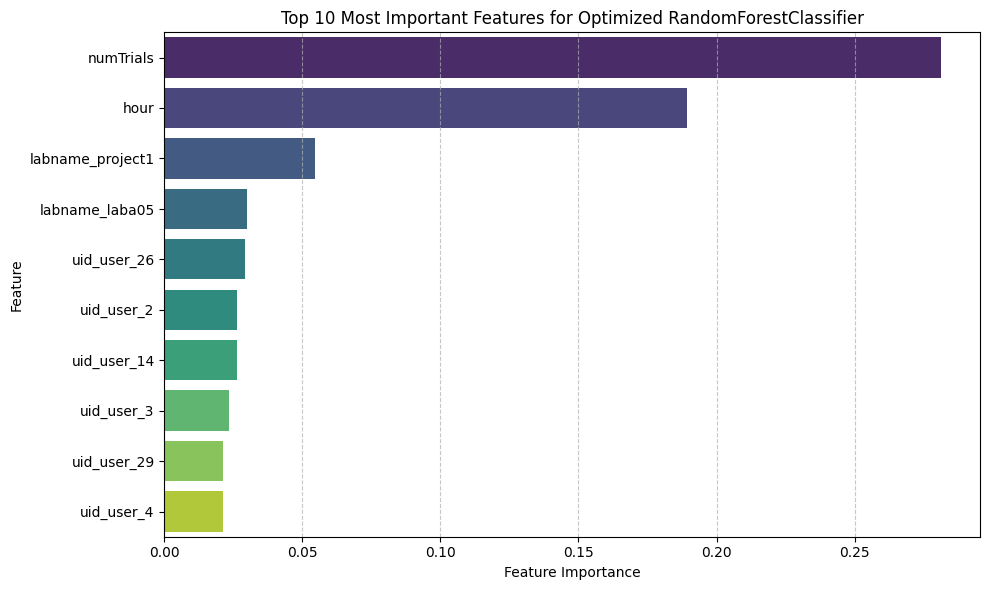

In [21]:
def plot_feature_importance_generic(feature_importances, feature_names, top_n=10, title="Feature Importance"):
    """
    Modelning feature_importances_ atributi asosida xususiyat muhimligini
    gorizontal ustunli grafikda chizadi (Decision Tree va Random Forest uchun mos).

    Args:
        feature_importances (numpy.ndarray): Modelning feature_importances_ massivi.
        feature_names (list): Xususiyat nomlari ro'yxati.
        top_n (int): Ko'rsatiladigan eng muhim xususiyatlarning soni.
        title (str): Grafik sarlavhasi.
    """
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', legend=False, palette='viridis')
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

feature_names = X.columns.tolist()
rf_feature_importances = final_rf_model.feature_importances_

plot_feature_importance_generic(
    rf_feature_importances,
    feature_names,
    top_n=10,
    title='Top 10 Most Important Features for Optimized RandomForestClassifier'
)

In [22]:
model_filename = 'optimized_random_forest_model.joblib'
joblib.dump(final_rf_model, model_filename) # save

['optimized_random_forest_model.joblib']

In [23]:
# Modelni yuklaymiz
loaded_rf_model = joblib.load(model_filename)

y_pred_loaded_rf = loaded_rf_model.predict(X_test)

accuracy_loaded_rf_test = accuracy_score(y_test, y_pred_loaded_rf)

print(f"Yuklangan RandomForest modelining test to'plamidagi aniqligi: {accuracy_loaded_rf_test}")

if accuracy_final_rf_test == accuracy_loaded_rf_test:
    print("\nAniqliklar mos kelmoqda.")
else:
    print("\nDIQQAT: Saqlangan va yuklangan model aniqliklari farq qilmoqda.")

Yuklangan RandomForest modelining test to'plamidagi aniqligi: 0.9378698224852071

Aniqliklar mos kelmoqda.
